# Atividade 03

## Restauração de imagem

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

### Imagem Original

JPEG (900, 1208) RGB


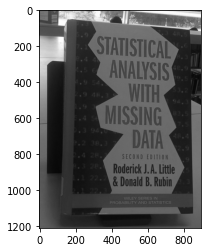

In [26]:
img = Image.open('03.restauração/image_(1).jpg')
plt.imshow(img)
print(img.format, img.size, img.mode)

### Impulsivo Unipolar

In [13]:
# Function to add noise as pepper with fifteen percent of chance of appearing and changing the intensity of the pixel to zero if the fifteen percent prevails.
def add_noise(img, noise_percent):
    img_array = np.array(img)
    height = img_array.shape[0]
    width = img_array.shape[1]
    for i in range(height):
        for j in range(width):
            if random.randint(0,99) < noise_percent:
                img_array[i][j] = 0
    return Image.fromarray(img_array)

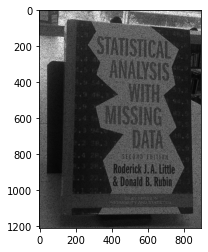

In [23]:
impulsivo_unipolar = add_noise(img, 15)
plt.imshow(impulsivo_unipolar)
save = impulsivo_unipolar.save("03.restauração/results/impulsivo_unipolar_image_(1).jpg", quality=95)

### Impulsivo Bipolar (Salt and Pepper)

In [22]:
# Function to add noise as salt and pepper with ten percent of chance of appearing and changing the intensity of the pixel to zero else 255 if the ten percent prevails.
def add_noise_salt_and_pepper(img, noise_percent):
    img_array = np.array(img)
    height = img_array.shape[0]
    width = img_array.shape[1]
    for i in range(height):
        for j in range(width):
            if random.randint(0,99) < noise_percent:
                if random.randint(0,99) < 50:
                    img_array[i][j] = 0
                else:
                    img_array[i][j] = 255
    return Image.fromarray(img_array)

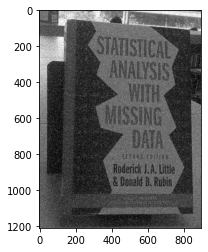

In [24]:
impulsivo_bipolar = add_noise_salt_and_pepper(img, 10)
plt.imshow(impulsivo_bipolar)
save = impulsivo_bipolar.save("03.restauração/results/impulsivo_bipolar_image_(1).jpg", quality=95)

### Gaussiano

In [120]:
# fuction to add a noise extracted randomly out of a gaussian with mean 10 and standard deviation of 30.
def add_noise_gaussian(img):
    mean = 10
    standard_deviation = 30
    img_array = np.array(img) # Esqueci de implementar no inicio...
    print(img.size)
    gaussian = np.random.normal(mean, standard_deviation, img_array.size)
    gaussian = gaussian.reshape(img_array.shape[0], img_array.shape[1], img_array.shape[2]).astype(np.uint8)

    print(gaussian.size)
    # gaussian = gaussian.reshape(img_array.size)
    # operands could not be broadcast together with shapes (1208,900,3) (900,1208) 
    img_array = img_array + gaussian
    return Image.fromarray(img_array)

(900, 1208)
3261600


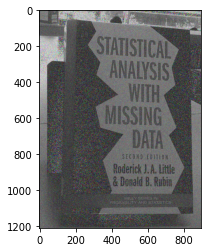

In [122]:
gaussian = add_noise_gaussian(img)
plt.imshow(gaussian)
save = gaussian.save("03.restauração/results/gaussian_image_(1).jpg", quality=95)